In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import math

## Fetch data
Uncomment and run this cell to download the data used in the Wapman paper into the `data/` directory

In [2]:
#import wget, os
#base = 'https://github.com/LarremoreLab/us-faculty-hiring-networks/raw/main/data/'
#file_names = ['edge-lists.csv', 'institution-stats.csv','stats.csv','yearly-stats.csv']
#for file in file_names:
#    if os.path.exists('data/'+file):
#        os.remove('data/'+file)
#    wget.download(base+file,out='data')

## Percentage of women over time by field
Use the summary stats in `data/yearly-stats.csv` to plot a graph comparing Math/Stats/OR to Academia as a whole

Text(0, 0.5, 'Fraction of Women')

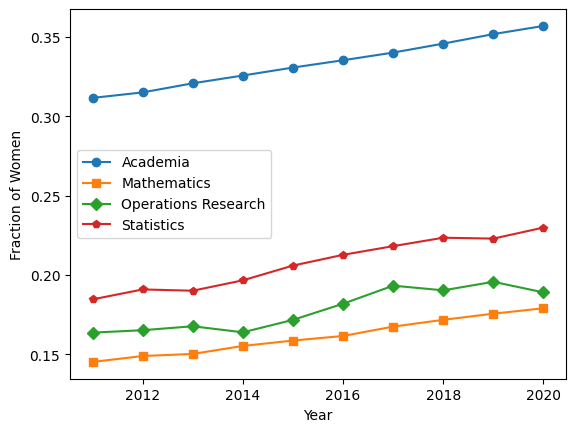

In [3]:
df = pd.read_csv('data/yearly-stats.csv')

plt.plot(df[df['TaxonomyValue'] == 'Academia']['Year'], df[df['TaxonomyValue'] == 'Academia']['FractionFemale'],  label='Academia',marker='o')
plt.plot(df[df['TaxonomyValue'] == 'Mathematics']['Year'], df[df['TaxonomyValue'] == 'Mathematics']['FractionFemale'],  label='Mathematics',marker='s')
plt.plot(df[df['TaxonomyValue'] == 'Operations Research']['Year'], df[df['TaxonomyValue'] == 'Operations Research']['FractionFemale'],  label='Operations Research',marker='D')
plt.plot(df[df['TaxonomyValue'] == 'Statistics']['Year'], df[df['TaxonomyValue'] == 'Statistics']['FractionFemale'],  label='Statistics',marker='p')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Fraction of Women')

## Examine gender data by institution

In [4]:
df_edges = pd.read_csv('data/edge-lists.csv')
df_math_edges = df_edges[df_edges['TaxonomyValue'] == 'Mathematics'].copy()
df_math_stats_or_edges = df_edges[(df_edges['TaxonomyValue'] == 'Mathematics') |(df_edges['TaxonomyValue'] == 'Statistics') | (df_edges['TaxonomyValue'] == 'Operations Reseach')].copy()
df_stats_edges = df_edges[df_edges['TaxonomyValue'] == 'Statistics'].copy()
df_or_edges = df_edges[df_edges['TaxonomyValue'] == 'Operations Research'].copy()

Some descriptive statistics for the fields

In [5]:
print("There were " + str(len(pd.unique(df_math_edges['InstitutionName']))) + " departments in the math sample")
print("There were " + str(int(df_math_edges['Men'].sum()+df_math_edges['Women'].sum())) + " people in the math sample")
print(str(round(df_math_edges['Women'].sum()/(df_math_edges['Men'].sum()+df_math_edges['Women'].sum())*100,1)) + "% were women")

print("There were " + str(len(pd.unique(df_stats_edges['InstitutionName']))) + " departments in the math sample")
print("There were " + str(int(df_stats_edges['Men'].sum()+df_stats_edges['Women'].sum())) + " people in the stats sample")
print(str(round(df_stats_edges['Women'].sum()/(df_stats_edges['Men'].sum()+df_stats_edges['Women'].sum())*100,1)) + "% were women")

print("There were " + str(len(pd.unique(df_or_edges['InstitutionName']))) + " departments in the math sample")
print("There were " + str(int(df_or_edges['Men'].sum()+df_or_edges['Women'].sum())) + " people in the OR sample")
print(str(round(df_or_edges['Women'].sum()/(df_or_edges['Men'].sum()+df_or_edges['Women'].sum())*100,1)) + "% were women")

print("There were " + str(int(df_math_stats_or_edges['Men'].sum()+df_math_stats_or_edges['Women'].sum())) + " people in the combined sample")
print(str(round(df_math_stats_or_edges['Women'].sum()/(df_math_stats_or_edges['Men'].sum()+df_math_stats_or_edges['Women'].sum())*100,1)) + "% were women")

There were 223 departments in the math sample
There were 7238 people in the math sample
16.8% were women
There were 122 departments in the math sample
There were 2576 people in the stats sample
20.9% were women
There were 51 departments in the math sample
There were 1034 people in the OR sample
19.3% were women
There were 9814 people in the combined sample
17.9% were women


Aggregate the gender data by institution

In [6]:
def OverallInstitutionCount(df):
    df_data_by_institution = pd.concat([df.groupby('InstitutionName')['Men'].sum(), df.groupby('InstitutionName')['Women'].sum()],axis=1)
    df_data_by_institution['Percentage of Women'] = df_data_by_institution['Women']/(df_data_by_institution['Men']+df_data_by_institution['Women'])*100
    return df_data_by_institution.reset_index()

df_data_by_institution_math = OverallInstitutionCount(df_math_edges)
df_data_by_institution_msor = OverallInstitutionCount(df_math_stats_or_edges)
df_data_by_institution_stats = OverallInstitutionCount(df_stats_edges)
df_data_by_institution_or = OverallInstitutionCount(df_or_edges)



Who are the 10 best Mathematics departments by Percentage of Women?

In [7]:
df_data_by_institution_math.sort_values(by='Percentage of Women', ascending=False).head(10)

,InstitutionName,Men,Women,Percentage of Women
14,Bryn Mawr,4.0,4.0,50.000000
56,Louisiana Tech,3.0,3.0,50.000000
115,UC Merced,6.0,6.0,50.000000
102,Teachers College Columbia,13.0,11.0,45.833333
136,UT Tyler,9.0,6.0,40.000000
182,University of New Hampshire,11.0,7.0,38.888889
24,Cleveland State,13.0,8.0,38.095238
48,Illinois State,20.0,12.0,37.500000
29,Drew,5.0,3.0,37.500000
19,Case Western Reserve,15.0,9.0,37.500000


Who are the worst, removing small departments (under 10 in sample)?

In [8]:
df_data_by_institution_math[df_data_by_institution_math['Men']+df_data_by_institution_math['Women']>10].sort_values(by='Percentage of Women', ascending=True).head(10)

,InstitutionName,Men,Women,Percentage of Women
169,University of Maryland Eastern Shore,11.0,0.0,0.000000
35,Florida Atlantic,26.0,0.0,0.000000
76,Oakland University,24.0,1.0,4.000000
186,University of North Texas,21.0,1.0,4.545455
84,Princeton,54.0,3.0,5.263158
79,Oklahoma State,36.0,2.0,5.263158
66,NYU,71.0,4.0,5.333333
209,Vanderbilt,50.0,3.0,5.660377
191,University of Pittsburgh,32.0,2.0,5.882353
78,Ohio University,31.0,2.0,6.060606


## Incorporate prestige

In [9]:
#The prestige data is contained in institution-stats.csv. We need to merge this with the gender data in df_edges
df_prestige = pd.read_csv('data/institution-stats.csv')
fields = ['Mathematics', 'Statistics', 'Operations Research']
combined_df = dict()
for field in fields:
    combined_df[field] = OverallInstitutionCount(df_edges[df_edges['TaxonomyValue'] == field].copy()).merge(df_prestige[df_prestige['TaxonomyValue'] == field].copy(),on='InstitutionName')
    combined_df[field] = combined_df[field].sort_values(by=['Percentage of Women'],ascending=False).reset_index(drop=True)
    combined_df[field] = combined_df[field].reset_index().rename(columns={'index' : 'Gender Rank' })
    combined_df[field] = combined_df[field].sort_values(by=['OrdinalPrestigeRank']).reset_index(drop=True)
    combined_df[field] = combined_df[field].reset_index().rename(columns={'index' : 'Rescaled Rank' })

combined_df['Mathematics']

,Rescaled Rank,Gender Rank,InstitutionName,Men,Women,Percentage of Women,InstitutionId,TaxonomyLevel,TaxonomyValue,NonAttritionEvents,AttritionEvents,ProductionRank,PrestigeRank,OrdinalPrestigeRank
0,0,78,Harvard,16.0,3.0,15.789474,87.0,Field,Mathematics,214.0,56.0,3,1.000000,0
1,1,156,Princeton,54.0,3.0,5.263158,167.0,Field,Mathematics,301.0,85.0,1,0.997586,1
2,2,131,University of Chicago,34.0,4.0,10.526316,261.0,Field,Mathematics,211.0,54.0,4,0.915439,2
3,3,129,MIT,58.0,7.0,10.769231,123.0,Field,Mathematics,280.0,73.0,2,0.914986,3
4,4,127,UC Berkeley,56.0,7.0,11.111111,251.0,Field,Mathematics,381.0,106.0,0,0.901592,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,156,5,University of Southern Mississippi,9.0,5.0,35.714286,336.0,Field,Mathematics,2.0,1.0,168,0.100969,205
157,157,20,Mississippi State,16.0,6.0,27.272727,136.0,Field,Mathematics,2.0,1.0,180,0.091462,207
158,158,108,University of Tulsa,21.0,3.0,12.500000,342.0,Field,Mathematics,4.0,1.0,149,0.087167,209
159,159,95,University of North Dakota,12.0,2.0,14.285714,319.0,Field,Mathematics,2.0,1.0,167,0.079871,212


We are going to define "Elite" as the top 25%, taking a cue from how AMS used to define Group I institutions

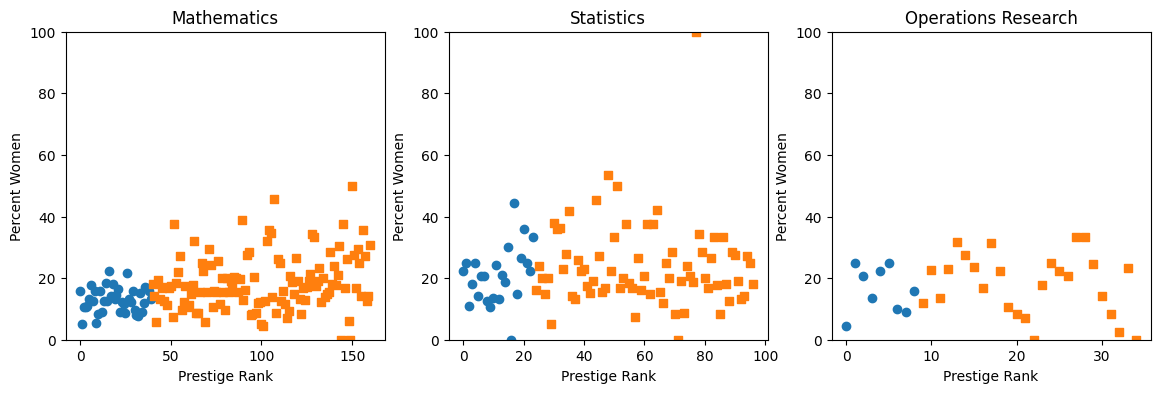

In [10]:
elite_df = dict()
non_elite_df = dict()
for field in fields:
    elite_df[field] = combined_df[field][combined_df[field]['Rescaled Rank'] < np.quantile(combined_df[field]['Rescaled Rank'],.25)]
    non_elite_df[field] = combined_df[field][combined_df[field]['Rescaled Rank'] >= np.quantile(combined_df[field]['Rescaled Rank'],.25)]


plt.figure(figsize=(14,4))
for (i,field) in enumerate(fields):
    plt.subplot(1,3,i+1)
    plt.scatter(elite_df[field]['Rescaled Rank'], elite_df[field]["Percentage of Women"])
    plt.scatter(non_elite_df[field]['Rescaled Rank'], non_elite_df[field]["Percentage of Women"],marker='s')
    plt.xlabel('Prestige Rank')
    plt.ylabel('Percent Women')
    plt.ylim(0,100)
    plt.title(field)

## Incorporate Funding Data

In [11]:
nsf_df = pd.read_csv("data/NSF DMS Awards.csv")
nsf_df['AwardedAmountToDate'] = nsf_df['AwardedAmountToDate'].apply(lambda x: x.replace('$','').replace(',','').replace('.00','')).astype(int)
print("The total amount awarded by NSF per year was $" + str(int(round(nsf_df['AwardedAmountToDate'].sum()/10,-6)/1000000))+"M")


print("\nThe total amounts awarded by award type were:")
print(nsf_df.groupby(by=['AwardInstrument'])['AwardedAmountToDate'].sum())

#Group the NSF awards by institution, and then merge with data frame containing gender data
nsf_institution = nsf_df.groupby('Organization')['AwardedAmountToDate'].sum()
nsf_frame = nsf_institution.to_frame().reset_index()
merged_df = combined_df['Mathematics'].merge(nsf_institution.to_frame(), left_on = 'InstitutionName',right_on='Organization',how='left')

#This merge didn't go great since the dataset and the NSF have variance in institution names...
print("\nThere were " + str(np.setdiff1d(combined_df['Mathematics']['InstitutionName'], nsf_frame['Organization']).size) + " institutions with a name mismatch between the two data frames")

#Produce file names.txt with data set institution names
with open("intermediate files/names.txt", "w") as txt_file:
    for line in np.setdiff1d(combined_df['Mathematics']['InstitutionName'], nsf_frame['Organization']):
        txt_file.write(line + "\n")

#Produce NSF_namees.txt with NSF institution names
array=nsf_frame['Organization'].astype(str).sort_values().values
with open("intermediate files/NSF_names.txt", "w") as txt_file:
    for line in array:
        txt_file.write(line + "\n")

The total amount awarded by NSF per year was $235M

The total amounts awarded by award type were:
AwardInstrument
Continuing Grant                  1323925777
Contract Interagency Agreement       4322936
Fellowship Award                    61387500
Interagency Agreement                 720669
Standard Grant                     959091715
Name: AwardedAmountToDate, dtype: int64

There were 123 institutions with a name mismatch between the two data frames


Manually, we created the file Institution Names.csv, which has an NSF institution name matched to each institution name from the dataset

In [12]:
name_map = pd.read_csv("intermediate files/Insitution Names.csv")
name_map

,Wapman name,NSF name
0,Air Force Institute of Technology,NaN
1,Arizona State,Arizona State University
2,Auburn,Auburn University
3,Baylor,Baylor University
4,Boston University,Trustees of Boston University
...,...,...
118,Washington University St. Louis,Washington University
119,Wayne State,Wayne State University
120,Wesleyan,Wesleyan University
121,Western Michigan,Western Michigan University


Text(0, 0.5, 'NSF DMS Average Annual Funds Awarded in Millions')

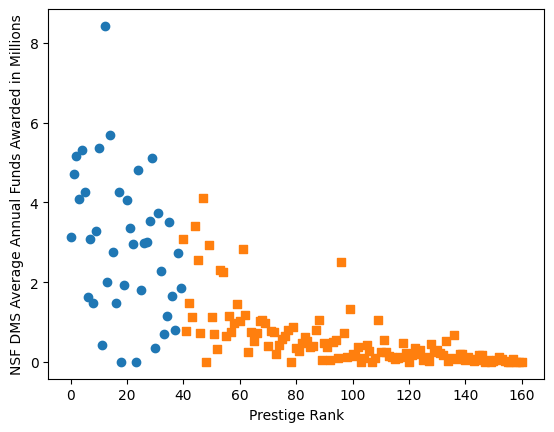

In [13]:
#Use our hand constructed name map to finish merging
merged_df2 = merged_df.merge(name_map, left_on = 'InstitutionName',right_on='Wapman name',how='left')
merged_df3 = merged_df2.merge(nsf_institution,left_on= 'NSF name', right_on = 'Organization',how='left')
merged_df3['AwardedAmount']=merged_df3['AwardedAmountToDate_x'].fillna(0)+merged_df3['AwardedAmountToDate_y'].fillna(0)
#Pull out just the columns we care about
df_merged_final = merged_df3[['InstitutionName','Percentage of Women','Rescaled Rank','AwardedAmount','Men','Women']]

#Plot Funding vs. prestige
elite = df_merged_final[df_merged_final['Rescaled Rank'] < np.quantile(df_merged_final['Rescaled Rank'],.25)]
non_elite = df_merged_final[df_merged_final['Rescaled Rank'] >= np.quantile(df_merged_final['Rescaled Rank'],.25)]
plt.scatter(elite['Rescaled Rank'], elite["AwardedAmount"]/10000000)
plt.scatter(non_elite['Rescaled Rank'], non_elite["AwardedAmount"]/10000000,marker='s')
plt.xlabel('Prestige Rank')
plt.ylabel('NSF DMS Average Annual Funds Awarded in Millions')

In [14]:
print("Elite institutions hoarded $" + str(int(round(elite['AwardedAmount'].sum()/10,-6)/1000000)) + "M of NSF money per year")
print("Non-Elite institutions, of which there are three times as many, were awarded only $" + str(int(round(non_elite['AwardedAmount'].sum()/10,-6)/1000000)) + "M of NSF money per year")

Elite institutions hoarded $119M of NSF money per year
Non-Elite institutions, of which there are three times as many, were awarded only $70M of NSF money per year


Maybe the previous plot is impacted by the size of departments, so lets make a per capita version

Text(0, 0.5, 'NSF DMS Average Annual Funds Awarded in Thousands per Capita')

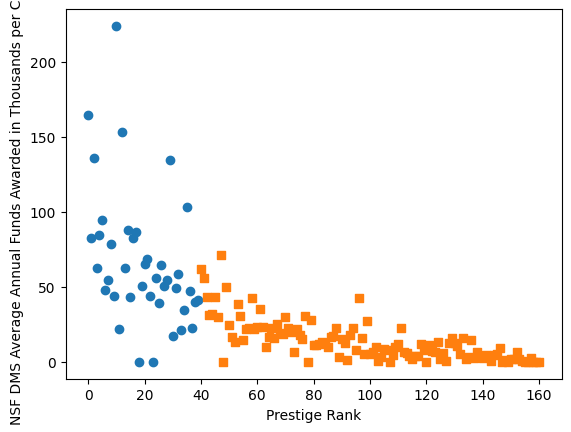

In [15]:
df_merged_final2=df_merged_final.copy()
df_merged_final2['Total']=df_merged_final2['Men']+df_merged_final2['Women']
elite = df_merged_final2[df_merged_final2['Rescaled Rank'] < np.quantile(df_merged_final2['Rescaled Rank'],.25)]
non_elite = df_merged_final2[df_merged_final2['Rescaled Rank'] >= np.quantile(df_merged_final2['Rescaled Rank'],.25)]
plt.scatter(elite['Rescaled Rank'], elite["AwardedAmount"]*1/elite['Total']*1/10000)
plt.scatter(non_elite['Rescaled Rank'], non_elite["AwardedAmount"]*1/non_elite['Total']*1/10000, marker='s')
plt.xlabel('Prestige Rank')
plt.ylabel('NSF DMS Average Annual Funds Awarded in Thousands per Capita')

Lets plot funding versus percentage of women

Text(0, 0.5, 'NSF DMS Average Annual Funds Awarded in Millions')

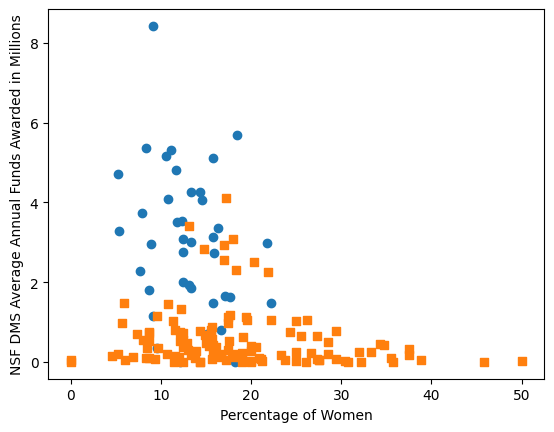

In [16]:
#plt.scatter(df_merged_final['Percentage of Women'], df_merged_final["AwardedAmount"]/10000000)
plt.scatter(elite['Percentage of Women'], elite["AwardedAmount"]/10000000)
plt.scatter(non_elite['Percentage of Women'], non_elite["AwardedAmount"]/10000000,marker='s')
plt.xlabel('Percentage of Women')
plt.ylabel('NSF DMS Average Annual Funds Awarded in Millions')

## Correlation analysis



### Percentage of women vs prestige

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Percentage of Women   R-squared (uncentered):                   0.570
Model:                             OLS   Adj. R-squared (uncentered):              0.568
Method:                  Least Squares   F-statistic:                              212.3
Date:                 Thu, 18 Jan 2024   Prob (F-statistic):                    3.80e-31
Time:                         13:26:03   Log-Likelihood:                         -635.65
No. Observations:                  161   AIC:                                      1273.
Df Residuals:                      160   BIC:                                      1276.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
PrestigeRank    28.8008      1.977     14.570      0.000      24.897      32.705
==============================================================================
Omnibus:                       11.187   Durbin-Watson:                   0.832
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.488
Skew:                           0.631   Prob(JB):                      0.00320
Kurtosis:                       3.345   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

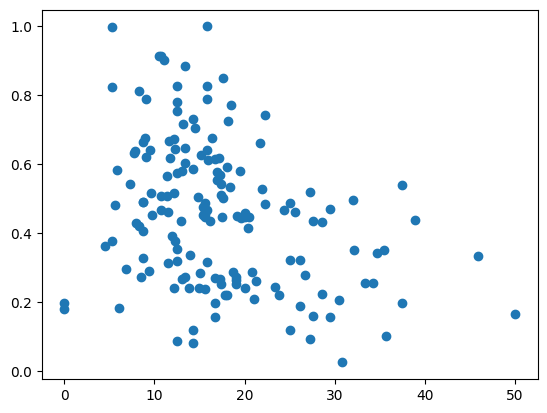

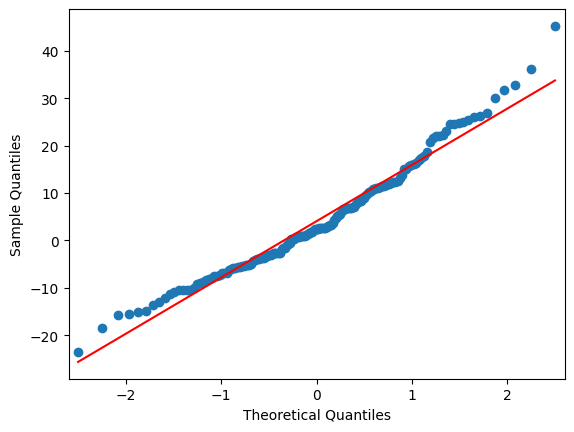

In [17]:
combined_df['Mathematics'][['Percentage of Women', 'PrestigeRank']].corr()

stats.pearsonr(combined_df['Mathematics']['Percentage of Women'], combined_df['Mathematics']['PrestigeRank'])


plt.scatter(combined_df['Mathematics']['Percentage of Women'],combined_df['Mathematics']['PrestigeRank'] )

model = sm.OLS(combined_df['Mathematics']['Percentage of Women'], combined_df['Mathematics']['PrestigeRank'], missing='drop')
model_result = model.fit()
model_result.summary()
sm.qqplot(model_result.resid, line='s');
model_result.summary()

Ranked correlation

In [18]:

stats.kendalltau(combined_df['Mathematics']['Gender Rank'], combined_df['Mathematics']['Rescaled Rank'])

SignificanceResult(statistic=-0.22795031055900622, pvalue=1.7718303828736545e-05)

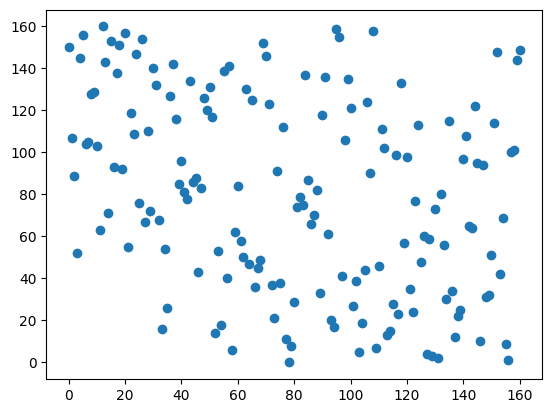

In [19]:
plt.scatter(combined_df['Mathematics']['Gender Rank'], combined_df['Mathematics']['Rescaled Rank'])

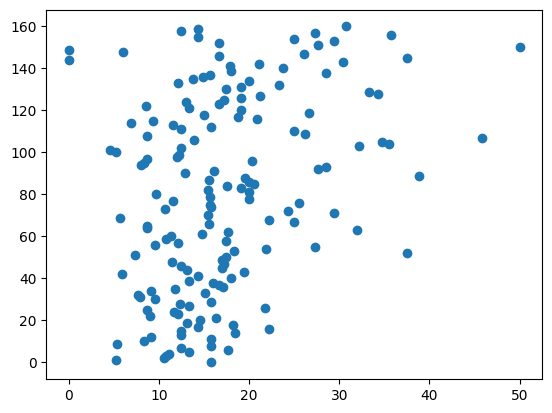

In [20]:
plt.scatter(combined_df['Mathematics']['Percentage of Women'], combined_df['Mathematics']['Rescaled Rank'])

In [21]:
stats.spearmanr(combined_df['Mathematics']['Percentage of Women'], combined_df['Mathematics']['Rescaled Rank'])

SignificanceResult(statistic=0.32954573528102027, pvalue=1.96575120059913e-05)

Is the percentage of women in the group of elite departments significantly different than the percentage in non-elite departments?

In [22]:
for field in fields:
    print(field)
    print("Elite percentage of women: " + str( elite_df[field]['Women'].sum() / (elite_df[field]['Men'].sum() + elite_df[field]['Women'].sum() ) ) )
    print("Nonelite percentage of women: " + str( non_elite_df[field]['Women'].sum() / (non_elite_df[field]['Men'].sum() + non_elite_df[field]['Women'].sum() ) ) )
    print(stats.chi2_contingency([[elite_df[field]['Men'].sum(),elite_df[field]['Women'].sum()],
                                  [non_elite_df[field]['Men'].sum(),non_elite_df[field]['Women'].sum()]]) )

Mathematics
Elite percentage of women: 0.12506680919294494
Nonelite percentage of women: 0.1813761244833455
Chi2ContingencyResult(statistic=29.364526008352886, pvalue=5.996533556144964e-08, dof=1, expected_freq=array([[1564.58622995,  306.41377005],
       [3439.41377005,  673.58622995]]))
Statistics
Elite percentage of women: 0.21303258145363407
Nonelite percentage of women: 0.21581450653983353
Chi2ContingencyResult(statistic=0.002895307598697841, pvalue=0.9570880858170816, dof=1, expected_freq=array([[ 313.10283518,   85.89716482],
       [1319.89716482,  362.10283518]]))
Operations Research
Elite percentage of women: 0.17040358744394618
Nonelite percentage of women: 0.18696397941680962
Chi2ContingencyResult(statistic=0.1959904779636031, pvalue=0.6579768696646997, dof=1, expected_freq=array([[182.32878412,  40.67121588],
       [476.67121588, 106.32878412]]))


### Prestige vs Funding 

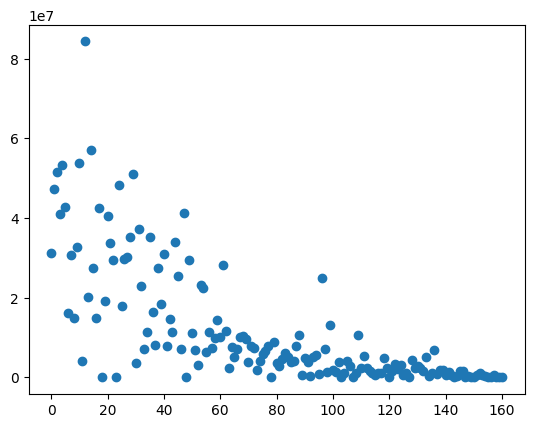

In [23]:
plt.scatter(df_merged_final['Rescaled Rank'],df_merged_final['AwardedAmount'])

In [24]:
stats.spearmanr(df_merged_final['Rescaled Rank'],df_merged_final['AwardedAmount'])

SignificanceResult(statistic=-0.8019988308728846, pvalue=2.0533864406812755e-37)

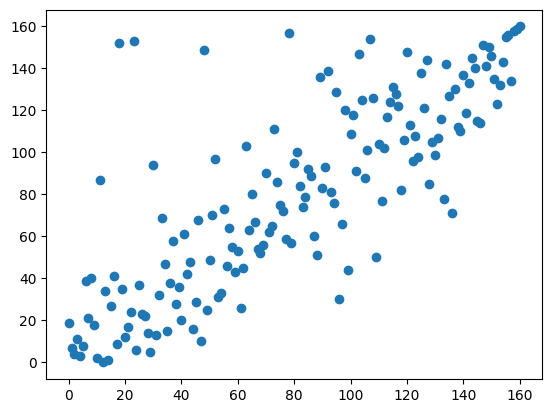

In [25]:
df_merged_final = df_merged_final.sort_values(by=['AwardedAmount'],ascending=False).reset_index(drop=True)
df_merged_final = df_merged_final.reset_index().rename(columns={'index' : 'Funding Rank' })
plt.scatter(df_merged_final['Rescaled Rank'],df_merged_final['Funding Rank'])

In [26]:
#getting some info about the scatter plot of rescaled rank and funding rank above
#y comes first, have to add a constant for intercept
X = df_merged_final['Rescaled Rank']
y = df_merged_final['Funding Rank']
X = sm.add_constant(X)
model = sm.OLS(y,X)
model_result = model.fit()
model_result.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Funding Rank   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     290.3
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.06e-37
Time:                        13:26:03   Log-Likelihood:                -762.89
No. Observations:                 161   AIC:                             1530.
Df Residuals:                     159   BIC:                             1536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.6934      4.365      3.596      0.000       7.073      24.314
Rescaled Rank     0.8038      0.047     17.039      0.000       0.711       0.897
==============================================================================
Omnibus:                       55.169   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.895
Skew:                           1.363   Prob(JB):                     7.00e-36
Kurtosis:                       7.087   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

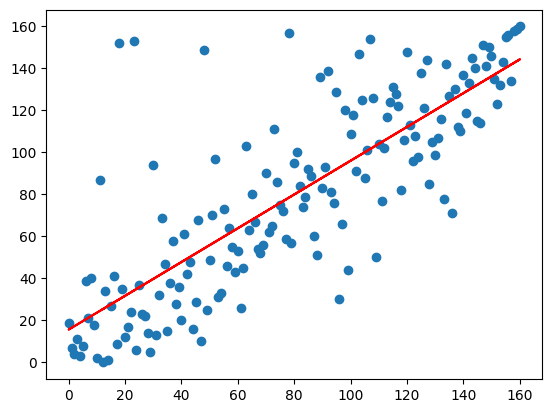

In [27]:
#plotting the line of best fit
plt.scatter(df_merged_final['Rescaled Rank'],df_merged_final['Funding Rank'])
plt.plot(df_merged_final['Rescaled Rank'],model_result.predict(X), color='red')


In [28]:
df_merged_final.head(20)

,Funding Rank,InstitutionName,Percentage of Women,Rescaled Rank,AwardedAmount,Men,Women
0,0,UCLA,9.090909,12,84289354.0,50.0,5.0
1,1,University of Michigan,18.461538,14,57010768.0,53.0,12.0
2,2,Brown,8.333333,10,53770574.0,22.0,2.0
3,3,UC Berkeley,11.111111,4,53189368.0,56.0,7.0
4,4,University of Chicago,10.526316,2,51632352.0,34.0,4.0
5,5,UNC,15.789474,29,51082824.0,32.0,6.0
6,6,University of Minnesota Twin Cities,11.627907,24,48187690.0,76.0,10.0
7,7,Princeton,5.263158,1,47213787.0,54.0,3.0
8,8,Stanford,13.333333,5,42721062.0,39.0,6.0
9,9,University of Wisconsin-Madison,14.285714,17,42523606.0,42.0,7.0


### Percentage of women vs funding

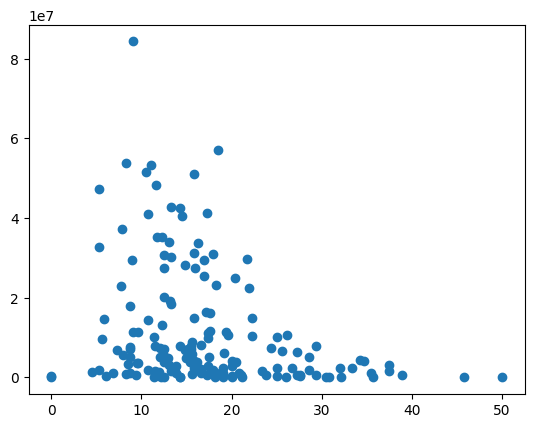

In [29]:
plt.scatter(df_merged_final['Percentage of Women'],df_merged_final['AwardedAmount'])

In [30]:
stats.spearmanr(df_merged_final['Percentage of Women'],df_merged_final['AwardedAmount'])

SignificanceResult(statistic=-0.3001796303878418, pvalue=0.00010938075291177111)

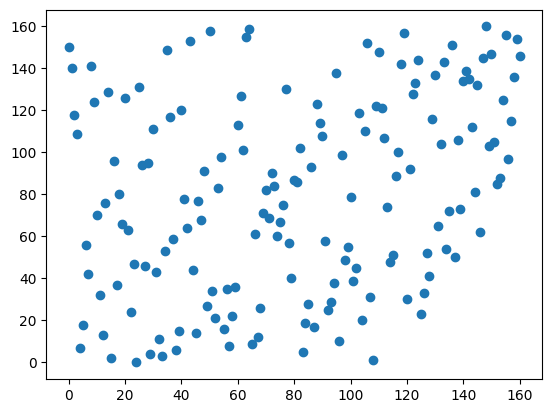

In [31]:
df_merged_final = df_merged_final.sort_values(by=['Percentage of Women']).reset_index(drop=True)
df_merged_final = df_merged_final.reset_index().rename(columns={'index' : 'Gender Rank' })
plt.scatter(df_merged_final['Gender Rank'],df_merged_final['Funding Rank'])

In [36]:
model = sm.OLS(df_merged_final['Funding Rank'], df_merged_final['Gender Rank'], missing='drop')
model_result = model.fit()
model_result.summary()
#sm.qqplot(model_result.resid, line='s');
#model_result.params


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Funding Rank   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.676
Method:                 Least Squares   F-statistic:                              336.4
Date:                Thu, 18 Jan 2024   Prob (F-statistic):                    3.49e-41
Time:                        13:40:04   Log-Likelihood:                         -866.22
No. Observations:                 161   AIC:                                      1734.
Df Residuals:                     160   BIC:                                      1738.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Gender Rank     0.8232      0.045     18.342      0.000       0.735       0.912
==============================================================================
Omnibus:                        5.024   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.137
Skew:                           0.421   Prob(JB):                       0.0766
Kurtosis:                       2.761   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## Gini Coefficient

In [33]:
def gini(x):
    # Mean absolute difference
    mad = np.abs(np.subtract.outer(x, x)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(x)
    # Gini coefficient
    g = 0.5 * rmad
    return g

print(gini(df_merged_final['AwardedAmount'].values))

0.6284699882316541


In [34]:
print(gini(nsf_institution.values))

0.8598051344866848
